<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/1_Linear_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression Models**

Here we use a data file called data.xlsx.

There are two columns in the dataset. The first column contains all the (input) X data and the second column contains all the output (Y) data.


The objective of this question is to build and assess the performance of a linear regression model for predicting the Y value by considering only the input X value. 

Throughout the code you should try to avoid the use of iterative ‘for loops’ and instead use NumPy as much as possible. 

You should only need to include a single for loop to control the number of iterations of gradient descent.

Import Python Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Define Function for Gradient Descent

In [0]:
def gradient_descent(bias, lambda1, alpha, X, Y, max_iter):


    # array will track MSE for each iteration of GD
    errorValues = []
    length = len(Y)

    
    for num in range(0, max_iter):   

        # calculate difference between predicted values and actual y values
        predictionError = ((bias + lambda1*X) - Y)

        # calculate the gradient for the bias and lambda
        gradBias =    (1.0/(2*length))*  (np.sum((predictionError)))
        gradLambda = (1.0/(2*length))*  (np.sum((predictionError*X)))

        # gradient descent rule to calculate new values for parameters
        bias = bias - (alpha * gradBias)
        lambda1 = lambda1 - (alpha * gradLambda)
    
        
        # calculate MSE for current values of lambda and bias
        MSE = (np.sum((predictionError)**2))/(length)
        errorValues.append(MSE)
        

    # plot improvement in MSE values 
    plt.plot(errorValues)
    plt.show()
  
    return bias,lambda1

Define Function for Linear Regression

In [0]:
def linearRegression(X, Y):
    
    # set initial parameters for model
    bias = 0
    lambda1 = 0
    
    alpha = 0.1 # learning rate
    max_iter=500

    # call gredient decent to calculate intercept(=bias) and slope(lambda1)
    bias, lambda1 = gradient_descent(bias, lambda1, alpha, X, Y, max_iter)
    print ('Final bias and  lambda1 values are = ', bias, lambda1, " respecively." )
    
    # plot the data and overlay the linear regression model
    yPredictions = (lambda1*X)+bias
    plt.scatter(X, Y)
    plt.plot(X,yPredictions,'k-')
    plt.show()

Load data.xlsx from github

In [14]:
!wget https://github.com/raj-vijay/dl/raw/master/data/data.xlsx

--2020-03-03 14:22:15--  https://github.com/raj-vijay/dl/raw/master/data/data.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raj-vijay/dl/master/data/data.xlsx [following]
--2020-03-03 14:22:16--  https://raw.githubusercontent.com/raj-vijay/dl/master/data/data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24401 (24K) [application/octet-stream]
Saving to: ‘data.xlsx’

data.xlsx           100%[===================>]  23.83K  --.-KB/s    in 0.01s   

2020-03-03 14:22:16 (1.92 MB/s) - ‘data.xlsx’ saved [24401/24401]



In [17]:
# Read data into a dataframe
df = pd.read_excel('data.xlsx')
df = df.dropna() 
df.head()

,X,Y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Visualize Dataset

In [0]:
# Convert Dataframe to a NumPy array
X = df.values

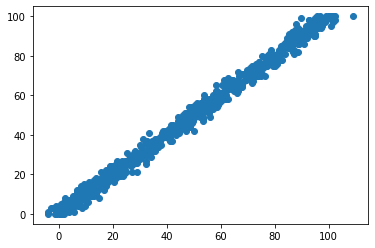

In [20]:
plt.scatter(X[:,1], X[:,0])
plt.show()

Apply Linear Regression on the Dataset

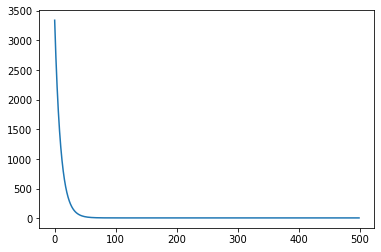

Final bias and  lambda1 values are =  49.939869170094525 28.95283303358322  respecively.


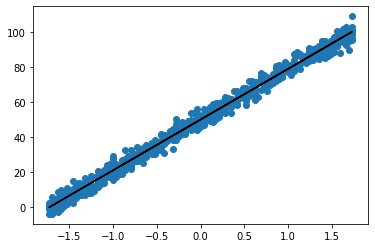

In [21]:
# Store feature and target data in separate arrays
Y = df['Y'].values
X = df['X'].values

# Perform standarization on the feature data
X = (X - np.mean(X))/np.std(X)

linearRegression(X, Y)